# Part I. Root-finding. Newton's iteration.

Write a function which performs Newton's iteration for a given function $f(x)$ with known derivative $f'(x)$. Your function should find the root of $f(x)$ with a predefined absolute accuracy $\epsilon$. 

In [4]:
import numpy as np

def newton_iteration(f, fder, x0, eps=1e-5, maxiter=1000):
    """Find a root of $f(x) = 0$ via Newton's iteration starting from x0.
    
    Parameters
    ----------
    f : callable
        The function to find a root of.
    fder : callable
        The derivative of `f`.
    x0 : float
        Initial value for the Newton's iteration.
    eps : float
        The target accuracy. 
        The iteration stops when the distance between successive iterates is below `eps`.
        Default is 1e-5.
    maxiter : int
        The maximum number of iterations (default is 1000.)
        Iterations terminate if the number of iterations exceeds `maxiter`.
        This parameter is only needed to avoid infinite loops if iterations wander off.
        
    Returns
    -------
    x : float
        The estimate for the root.
    niter : int
        The number of iterations.
    """
    x_old = x0
    x = x_old - f(x_old)/fder(x_old)
    
    niter = 1
    
    
    while niter <= maxiter and abs(x - x_old) >= eps:
        x_old = x
        x = x_old - f(x_old)/fder(x_old)
        niter += 1
    
    return x, niter

# ... ENTER YOUR CODE HERE ...

### Test I.1 

Test your implementation on a simple example, $f(x) = x^2 - 1$ or similar. (20% of the total grade)

In [5]:
# ... ENTER YOUR CODE HERE ...
def f(x):
    return x**2 - 1   #функция из примера
def fder(x):
    return 2 * x

x_0 = 1000

x_nill, niter = newton_iteration(f, fder, x_0)
print(x_nill, niter)

1.0000000000000118 14


### Test I.2

Now consider a function which has a multiple root. Take $f(x) = (x^2 - 1)^2$ as an example. Implement a modified Newton's iteraion,

$$
x_{n+1} = x_{n} - m \frac{f(x_n)}{f'(x_n)}
$$

and vary $m= 1, 2, 3, 4, 5$. Check the number of iterations required for convergence within a fixed $\epsilon$. Are your observations consistent with the expectation that the convergence is quadratic is $m$ equals the multiplicity of the root, and is linear otherwise? (40% of the total grade)

In [6]:
# ... ENTER YOUR CODE HERE ...
def newton_iteration_mod(f, fder, x0, m, eps=1e-5, maxiter=1000):
    x_old = x0
    x = x_old - f(x_old)/fder(x_old)
    
    niter = 1
    
    
    while niter <= maxiter and abs(x - x_old) >= eps:
        x_old = x
        x = x_old - m * f(x_old)/fder(x_old)
        niter += 1
    
    return x, niter


def f1(x):
    return (x**2 - 1)**2

def f1der(x):
    return 4 * (x**2 - 1) * x


x0 = 50

Multiplicity = np.arange(5) + 1

for i in Multiplicity:
    nill, iterations = newton_iteration_mod(f1, f1der, x0, i)
    print(f'For m = {i}, converged in {iterations} iterations, root is {nill}')


For m = 1, converged in 30 iterations, root is 1.0000059984358023
For m = 2, converged in 10 iterations, root is 1.0000000000027585
For m = 3, converged in 19 iterations, root is 1.0000027769171689
For m = 4, converged in 1001 iterations, root is 37.504999999999164
For m = 5, converged in 1001 iterations, root is 0.036686764403831784


Видно, что при m = 2, кол-во итераций сокращается => скорость сходимости квадратична, если m = кратности корня

# Part II. Fixed-point iteration

Consider the following equation:

$$
\sqrt{x} = \cos{x}
$$

Plot the left-hand side and right-hand side of this equation, and localize the root graphically. Estimate the location of the root by visual inspection of the plot.

Write a function which finds the solution using fixed-point iteration up to a predefined accuracy $\epsilon$. Compare the result to an estimate from a visual inspection.

Next, rewrite the fixed-point problem in the form

$$
x = x - \alpha f(x)
$$

where $\alpha$ is the free parameter. Check the dependence of the number of iterations required for a given $\epsilon$ on $\alpha$. Compare your results to an expectation that the optimal value of $\alpha$ is given by 

$$
\alpha = \frac{2}{m + M}
$$

where $0 < m < |f'(x)| < M$ over the localization interval. (40% of the total grade)

кажется, что выбрать, например, sin(x) - x или x - sin(x) мы должны сами, так как в таком методе нельзя учесть
то, как именно от-но текущей точки мы должны сместиться, и с помощью взгляда на график мы должны
внести эту самую определенность по знаку функции справа и слева от точки
Это можно было проверять, зная производную в корне(очень близко к корню), а можно из графика всё смотреть

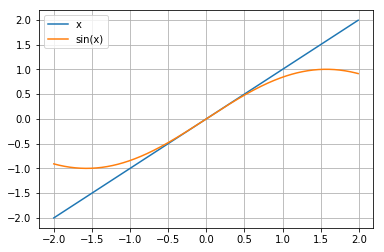

Исходное уравнение: sin(x) = x

For a equals 48.25078319187109, number of iterations: 10001, root is 0.0024919019044175412
For a equals 51.467502071329164, number of iterations: 10001, root is 0.0024128139933206096
For a equals 54.684220950787235, number of iterations: 10001, root is 0.0023408075536398426
For a equals 57.900939830245306, number of iterations: 10001, root is 0.0022748852056452876
For a equals 61.11765870970338, number of iterations: 10001, root is 0.0022142357665179456
For a equals 64.33437758916145, number of iterations: 10001, root is 0.0021581918171116985
For a equals 67.55109646861952, number of iterations: 10001, root is 0.0021061985193178163
For a equals 70.76781534807759, number of iterations: 10001, root is 0.002057790320586146
For a equals 73.98453422753566, number of iterations: 10001, root is 0.0020125732914126047
For a equals 77.20125310699373, number of iterations: 10001, root is 0.001970211553756847
For a equals 80.4179719864518, number of iterations: 1000

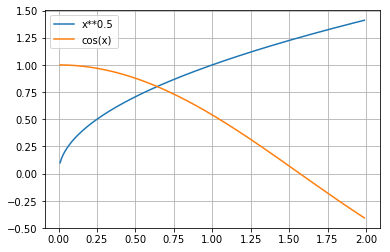

Исходное уравнение: cos(x) = x^0.5

For a equals 0.24235463871236418, number of iterations: 58, root is 0.641714371088518
For a equals 0.2585116146265218, number of iterations: 54, root is 0.6417143710616973
For a equals 0.2746685905406794, number of iterations: 51, root is 0.6417143710051368
For a equals 0.290825566454837, number of iterations: 47, root is 0.6417143710371421
For a equals 0.3069825423689946, number of iterations: 44, root is 0.641714371028698
For a equals 0.3231395182831522, number of iterations: 42, root is 0.6417143709763136
For a equals 0.3392964941973098, number of iterations: 39, root is 0.6417143710007306
For a equals 0.3554534701114674, number of iterations: 37, root is 0.6417143709775303
For a equals 0.371610446025625, number of iterations: 35, root is 0.6417143709670322
For a equals 0.3877674219397826, number of iterations: 33, root is 0.6417143709663905
2/(m + M) was 0.32313951828315224


In [37]:
# ... ENTER YOUR CODE HERE ...
import matplotlib.pyplot as plt

def root(x):
    return np.sqrt(x) #тут просто несколько функций, я тестил на разных; ниже алгоритм для x = sin(x); не самый удачный пример, так как он не сойдется ~никогда :)
def cos(x):
    return np.cos(x)
def sin(x):
    return np.sin(x)
def f2(x):
    return x - sin(x)
def f3(x):
    return (x**0.5 - cos(x))
def fder2(x):
    return (1 - cos(x))
def fder3(x):
    return (sin(x) + 0.5/x**0.5)



#----------------------------------------------------------Отделяю часть кода, связанную, с алгоритмом, и часть связанную с заданием уравнения


def fixed_point(f, x0, a, eps=1e-5, maxiter=1000):   #переписанный алгоритм, но уже с коэффициентом
    x_old = x0
    x = x_old - a * f(x_old)
    
    niter = 1
    
    
    while niter <= maxiter and abs(x - x_old) >= eps:
        x_old = x
        x = x_old - a * f(x_old)
        niter += 1
    
    return x, niter

def analyser(start, end, fder, step=1e-2):              #Функция определяет оптимальный коэффициент
    Localization_interval = np.arange(start, end, step)
    Min = +np.inf
    Max = -np.inf
    
    for i in Localization_interval:
        Temp = np.abs(fder(i))
        if Temp > Max: Max = Temp
        if Temp < Min: Min = Temp
            
    Optimal = 2 / (Max + Min)
    return Optimal



#---------------------------------------------------------
N = np.arange(-2, 2, 0.01)

F1 = np.array([i for i in N])
F2 = np.array([sin(i) for i in N])

plt.plot(N, F1)
plt.plot(N, F2)  # => Можно локалиловать корень от -0.25 до 0.25(интервал можно сделать и поменьше конечно, но пусть будет так)
plt.legend(('x','sin(x)'))
plt.grid()
plt.show()

Interval = (-0.25, 0.25)

print('Исходное уравнение: sin(x) = x\n')
Best = analyser(*Interval, fder2)
Prefactors = np.arange(0.75 * Best, 1.25 * Best, 0.05 * Best)

for a in Prefactors:
    x_null, iters = fixed_point(f2, 0.1, a, eps=1e-10, maxiter=1e4)
    print(f'For a equals {a}, number of iterations: {iters}, root is {x_null}')
print(f'2/(m + M) was {Best}')

#---------------------------------------------------------
N = np.arange(0.01, 2, 0.01)

F1 = np.array([np.sqrt(i) for i in N])
F2 = np.array([cos(i) for i in N])
plt.figure()
plt.plot(N, F1)
plt.plot(N, F2)  # => Можно локалиловать корень от 0.01 до 1
plt.legend(('x**0.5','cos(x)'))
plt.grid()
plt.show()

Interval = (0.01, 1)

print('Исходное уравнение: cos(x) = x^0.5\n')

Best_ = analyser(*Interval, fder3)
Prefactors_ = np.arange(0.75 * Best_, 1.25 * Best_, 0.05 * Best_)

for a in Prefactors_:
    x_null, iters = fixed_point(f3, 0.8, a, eps=1e-10, maxiter=1e4)
    print(f'For a equals {a}, number of iterations: {iters}, root is {x_null}')
print(f'2/(m + M) was {Best_}')

Для других функций оптимальное значение действительно было около 2/(m+M), в некоторой его окрестности было одинаковое кол-во итераций

# Part III. Newton's fractal.

(Not graded). 

Consider the equation

$$
x^3 = 1
$$

It has three solutions in the complex plane, $x_k = \exp(i\, 2\pi k/ 3)$, $k = 0, 1, 2$.

The Newton's iterations converge to one of these solutions, depending on the starting point in the complex plane (to converge to a complex-valued solution, the iteration needs a complex-valued starting point).

Plot the \emph{basins of attraction} of these roots on the complex plane of $x$ (i.e., on the plane $\mathrm{Re}x$ -- $\mathrm{Im}x$). To this end, make a series of calculations, varying the initial conditions on a grid of points. 
Color the grid in three colors, according to the root, to which iterations converged.

# АЛГОРИТМ СНИЗУ РАБОТАЕТ ДОЛГО

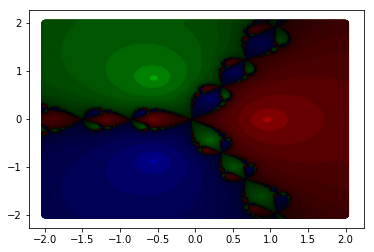

In [44]:
# a = np.complex(a) - преобразование в комплексное число

def func(x):
    return x**3 - 1
def funcder(x):
    return 3 * x**2

Points = 1e3              #чтобы строить быстрее(сильно быстрее), можно поставить значение 1e2, но тогда границы будут неплавными

Border = 2
Colors = np.array([[1. , 0. , 0.], [0. , 1. , 0.], [0. , 0. , 1.]])

Re_Grid = np.arange(-Border + Border / Points , Border , 2 * Border / Points)    #Тут я разметил некую сетку, в каких точках мы будем смотреть сходимость
Im_Grid = np.arange(-Border + Border / Points , Border , 2 * Border / Points)

Roots = np.array([np.complex(1, 0), np.exp(np.complex(0, 2 * np.pi / 3)), np.exp(np.complex(0, 4 * np.pi / 3))])    #Завёел массив с корнями, удобно для назначения индексов

ColorMap = np.zeros((int(Points), int(Points), 3))                                          #Тут будут храниться цвета для точек


for r in range(int(Points)):
    for i in range(int(Points)):
        x0, iters = newton_iteration(func, funcder, np.complex(Re_Grid[r], Im_Grid[i]))
        Index = np.argmin(np.abs(Roots - x0))
        ColorMap[r, i, :] = Colors[Index]*(1 - (iters-2)/iters)       #Назначил точке её цвет, решил что неплохо было бы в зависимости от итераций делать точку тусклее;
                                                                  #Такая конструкция - скорее империческая; в моем алгоритме min(iters) это 1, и с хорошей точностью вряд ли за эту итерацию всё сойдется, поэтому значение цвета не уйдет за 1.
for i in range(int(Points)):
    X = np.array([Re_Grid[i] for j in Re_Grid])      #для каждой вещественной координаты, рисую точку во всех мнимых
    plt.scatter(X, Im_Grid, c=ColorMap[i, :, :])

Хорошо выделяются 3 яркие области, в которых находятся 3 корня уравнения